In [30]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go
from bs4 import BeautifulSoup as soup
from datetime import date,time
from urllib.request import Request,urlopen
import warnings
warnings.filterwarnings("ignore")

from pandas_profiling import ProfileReport

In [27]:
#!pip install pandas_profiling

#web scrapping


<!DOCTYPE html>

<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID Live - Coronavirus Statistics - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="6
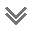

In [7]:
url = "https://www.worldometers.info/coronavirus/"
req = Request(url,headers={'User-Agent':"Mozilla/5.0"})

webpage = urlopen(req)
page_soup = soup(webpage,"html.parser")
page_soup

In [8]:
today = datetime.now()
yesterday_str = "%s %d,%d" %(date.today().strftime("%b"),today.day-1,today.year)
yesterday_str

'Mar 14,2022'

In [9]:
table = page_soup.findAll("table",{"id":"main_table_countries_yesterday"})

containers = table[0].findAll("tr",{"style":""})
title = containers[0]
del containers[0]
all_data = []
clean = True
for country in containers:
  country_data = []
  country_container = country.findAll("td")

  if country_container[1].text == "China":
    continue
  for i in range(1,len(country_container)):
    final_feature = country_container[i].text
    if clean :
      if i != 1 and i != len(country_container)-1:
        final_feature = final_feature.replace(",","")

        if final_feature.find('+') != -1:
          final_feature = final_feature.replace("+","")
          final_feature = float(final_feature)
        elif final_feature.find('-') != -1:
          final_feature = final_feature.replace("-","")
          final_feature = float(final_feature)*-1
      if final_feature == 'N/A':
        final_feature = 0
      elif final_feature == "" or final_feature == " " :
        final_feature = -1
    country_data.append(final_feature)
  all_data.append(country_data)

In [10]:
all_data

[['World',
  '459731878',
  1202564.0,
  '6067240',
  4052.0,
  '393190478',
  1500602.0,
  '60474160',
  '65368',
  '58979',
  '778.4',
  -1,
  -1,
  -1,
  'All',
  '\n',
  -1,
  -1,
  -1,
  -1,
  -1],
 ['USA',
  '81216268',
  17267.0,
  '991038 ',
  326.0,
  '56282006',
  202928.0,
  '23943224',
  '4090',
  '242948',
  '2965',
  '966788183',
  '2892023',
  '334294730 ',
  'North America',
  '4',
  '337',
  '0',
  '52',
  '1.0',
  '71,623'],
 ['India',
  '42996062',
  2568.0,
  '516005 ',
  98.0,
  '42446171',
  4722.0,
  '33886',
  '8944',
  '30646',
  '368',
  '779052383',
  '555271',
  '1403013575 ',
  'Asia',
  '33',
  '2719',
  '2',
  '2',
  '0.07',
  '24'],
 ['Brazil',
  '29382196',
  13420.0,
  '655326 ',
  187.0,
  '27838793',
  96469.0,
  '888077',
  '8318',
  '136584',
  '3046',
  '63776166',
  '296465',
  '215122061 ',
  'South America',
  '7',
  '328',
  '3',
  '62',
  '0.9',
  '4,128'],
 ['France',
  '23532997',
  18853.0,
  '140294 ',
  185.0,
  '22261297',
  97353.0,
  

In [11]:
df = pd.DataFrame(all_data)
df.drop([15,16,17,14,19,20],inplace=True,axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,18
0,World,459731878,1202564.0,6067240,4052.0,393190478,1500602.0,60474160,65368,58979,778.4,-1,-1,-1,-1
1,USA,81216268,17267.0,991038,326.0,56282006,202928.0,23943224,4090,242948,2965,966788183,2892023,334294730,52
2,India,42996062,2568.0,516005,98.0,42446171,4722.0,33886,8944,30646,368,779052383,555271,1403013575,2
3,Brazil,29382196,13420.0,655326,187.0,27838793,96469.0,888077,8318,136584,3046,63776166,296465,215122061,62
4,France,23532997,18853.0,140294,185.0,22261297,97353.0,1131406,1855,359181,2141,246629975,3764280,65518499,288


In [12]:
column_lables = ["Country","Total_cases","New_cases","Total_deaths","New_deaths","Total_recovered","New_recovered","Active_cases","Serious/Critical","Total_cases/1M","Deaths/1M","Total_tests","Tests/1M","Population","Continent"]
df.columns = column_lables

In [13]:
df.head()

,Country,Total_cases,New_cases,Total_deaths,New_deaths,Total_recovered,New_recovered,Active_cases,Serious/Critical,Total_cases/1M,Deaths/1M,Total_tests,Tests/1M,Population,Continent
0,World,459731878,1202564.0,6067240,4052.0,393190478,1500602.0,60474160,65368,58979,778.4,-1,-1,-1,-1
1,USA,81216268,17267.0,991038,326.0,56282006,202928.0,23943224,4090,242948,2965,966788183,2892023,334294730,52
2,India,42996062,2568.0,516005,98.0,42446171,4722.0,33886,8944,30646,368,779052383,555271,1403013575,2
3,Brazil,29382196,13420.0,655326,187.0,27838793,96469.0,888077,8318,136584,3046,63776166,296465,215122061,62
4,France,23532997,18853.0,140294,185.0,22261297,97353.0,1131406,1855,359181,2141,246629975,3764280,65518499,288


In [14]:
df.drop(['Continent'],inplace=True,axis=1)

In [15]:
df.head()

,Country,Total_cases,New_cases,Total_deaths,New_deaths,Total_recovered,New_recovered,Active_cases,Serious/Critical,Total_cases/1M,Deaths/1M,Total_tests,Tests/1M,Population
0,World,459731878,1202564.0,6067240,4052.0,393190478,1500602.0,60474160,65368,58979,778.4,-1,-1,-1
1,USA,81216268,17267.0,991038,326.0,56282006,202928.0,23943224,4090,242948,2965,966788183,2892023,334294730
2,India,42996062,2568.0,516005,98.0,42446171,4722.0,33886,8944,30646,368,779052383,555271,1403013575
3,Brazil,29382196,13420.0,655326,187.0,27838793,96469.0,888077,8318,136584,3046,63776166,296465,215122061
4,France,23532997,18853.0,140294,185.0,22261297,97353.0,1131406,1855,359181,2141,246629975,3764280,65518499


In [16]:
for label in df.columns:
  if label != 'Country':
    df[label] = pd.to_numeric(df[label])

In [17]:
df.head()

,Country,Total_cases,New_cases,Total_deaths,New_deaths,Total_recovered,New_recovered,Active_cases,Serious/Critical,Total_cases/1M,Deaths/1M,Total_tests,Tests/1M,Population
0,World,459731878,1202564.0,6067240,4052.0,393190478,1500602.0,60474160,65368,58979.0,778.4,-1,-1,-1
1,USA,81216268,17267.0,991038,326.0,56282006,202928.0,23943224,4090,242948.0,2965.0,966788183,2892023,334294730
2,India,42996062,2568.0,516005,98.0,42446171,4722.0,33886,8944,30646.0,368.0,779052383,555271,1403013575
3,Brazil,29382196,13420.0,655326,187.0,27838793,96469.0,888077,8318,136584.0,3046.0,63776166,296465,215122061
4,France,23532997,18853.0,140294,185.0,22261297,97353.0,1131406,1855,359181.0,2141.0,246629975,3764280,65518499


In [18]:
df['%Inc_cases'] = df["New_cases"]/df["Total_cases"]*100
df['%Inc_deaths'] = df["New_deaths"]/df["Total_deaths"]*100
df['%Inc_recovered'] = df["New_recovered"]/df["Total_recovered"]*100

In [19]:
df.head()

,Country,Total_cases,New_cases,Total_deaths,New_deaths,Total_recovered,New_recovered,Active_cases,Serious/Critical,Total_cases/1M,Deaths/1M,Total_tests,Tests/1M,Population,%Inc_cases,%Inc_deaths,%Inc_recovered
0,World,459731878,1202564.0,6067240,4052.0,393190478,1500602.0,60474160,65368,58979.0,778.4,-1,-1,-1,0.261579,0.066785,0.381648
1,USA,81216268,17267.0,991038,326.0,56282006,202928.0,23943224,4090,242948.0,2965.0,966788183,2892023,334294730,0.021261,0.032895,0.360556
2,India,42996062,2568.0,516005,98.0,42446171,4722.0,33886,8944,30646.0,368.0,779052383,555271,1403013575,0.005973,0.018992,0.011125
3,Brazil,29382196,13420.0,655326,187.0,27838793,96469.0,888077,8318,136584.0,3046.0,63776166,296465,215122061,0.045674,0.028535,0.346527
4,France,23532997,18853.0,140294,185.0,22261297,97353.0,1131406,1855,359181.0,2141.0,246629975,3764280,65518499,0.080113,0.131866,0.437320


#EDA

In [20]:
cases = df[["Total_recovered","Active_cases","Total_deaths"]].loc[0]

In [ ]:
cases_df = pd.DataFrame(cases).reset_index()
cases_df.columns = ["Type","Total"]
cases_df

# New section

In [ ]:
cases_df["Percentage"] = np.round(100*cases_df['Total']/np.sum(cases_df["Total"]),2)
cases_df["Virus"] = ["COVID-19" for i in range(len(cases_df))]
cases_df

In [33]:
fig = px.bar(cases_df,x = "Virus",y="Percentage",color = "Type",hover_data=["Total"])

In [ ]:
fig

In [36]:
cases = df[["New_cases","New_deaths","New_recovered"]].loc[0]
cases_df = pd.DataFrame(cases).reset_index()
cases_df.columns = ["Type","Total"]
cases_df

,Type,Total
0,New_cases,1202564.0
1,New_deaths,4052.0
2,New_recovered,1500602.0


In [37]:
cases_df["Percentage"] = np.round(100*cases_df['Total']/np.sum(cases_df["Total"]),2)
cases_df["Virus"] = ["COVID-19" for i in range(len(cases_df))]
cases_df

,Type,Total,Percentage,Virus
0,New_cases,1202564.0,44.42,COVID-19
1,New_deaths,4052.0,0.15,COVID-19
2,New_recovered,1500602.0,55.43,COVID-19


In [39]:
fig = px.bar(cases_df,x = "Virus",y="Percentage",color = "Type",hover_data=["Total"])
fig.show()

In [46]:
per = np.round(df[["%Inc_cases","%Inc_deaths","%Inc_recovered"]].loc[0],2)
per_df = pd.DataFrame(per)
per_df.columns = ["Percentage"]
fig = go.Figure()
fig.add_trace(go.Bar(x= per_df.index,y=per_df['Percentage'],marker_color=['Yellow',"blue",'red']))

In [50]:
Country_df = df.drop([0])
Country_df

,Country,Total_cases,New_cases,Total_deaths,New_deaths,Total_recovered,New_recovered,Active_cases,Serious/Critical,Total_cases/1M,Deaths/1M,Total_tests,Tests/1M,Population,%Inc_cases,%Inc_deaths,%Inc_recovered
1,USA,81216268,17267.0,991038,326.0,56282006,202928.0,23943224,4090,242948.0,2965.0,966788183,2892023,334294730,0.021261,0.032895,0.360556
2,India,42996062,2568.0,516005,98.0,42446171,4722.0,33886,8944,30646.0,368.0,779052383,555271,1403013575,0.005973,0.018992,0.011125
3,Brazil,29382196,13420.0,655326,187.0,27838793,96469.0,888077,8318,136584.0,3046.0,63776166,296465,215122061,0.045674,0.028535,0.346527
4,France,23532997,18853.0,140294,185.0,22261297,97353.0,1131406,1855,359181.0,2141.0,246629975,3764280,65518499,0.080113,0.131866,0.437320
5,UK,19700952,47181.0,162873,45.0,18378375,50086.0,1159704,253,287644.0,2378.0,489876300,7152434,68490853,0.239486,0.027629,0.272527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Samoa,48,-1.0,-1,-1.0,28,-1.0,20,-1,239.0,-1.0,-1,-1,200650,-2.083333,100.000000,-3.571429
219,Vatican City,29,-1.0,-1,-1.0,28,-1.0,1,-1,36070.0,-1.0,-1,-1,804,-3.448276,100.000000,-3.571429
220,Western Sahara,10,-1.0,1,-1.0,8,-1.0,1,-1,16.0,2.0,-1,-1,622226,-10.000000,-100.000000,-12.500000
221,Niue,1,-1.0,-1,-1.0,-1,-1.0,1,-1,608.0,-1.0,-1,-1,1645,-100.000000,100.000000,100.000000


In [66]:
LOOK_AT = 5
Country = Country_df.columns[1:14]
fig = go.Figure()
c = 0
for i in Country_df.index:
  if c<LOOK_AT:
    fig.add_trace(go.Bar(name = Country_df['Country'][i],x = Country,y=Country_df.loc[i][1:14]))
  else:
    break
  c += 1
fig.update_layout(title={"text":f'{LOOK_AT} Countries affected'},yaxis_type ='log')